# –ê—Å—Å–æ—Ü–∏–∞—Ü–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π Apriori

# –ü—Ä–∞–≤–∏–ª–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–æ–≤ –∑–∞–∫–∞–∑–æ–≤

In [1]:
# %% -------------------- 0. –ò–º–ø–æ—Ä—Ç –∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏ --------------------
import os, gc, warnings
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates
from scipy.stats import chi2_contingency
from tqdm.notebook import tqdm

warnings.filterwarnings("ignore")
plt.style.use("default")

DATA_DIR = r"D:\instacart\archive"

In [2]:
# %% -------------------- 1. –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö --------------------
user_cluster   = pd.read_csv(os.path.join(DATA_DIR, "user_segments.csv"))

# NEW: —Å–µ–≥–º–µ–Ω—Ç—ã –∑–∞–∫–∞–∑–æ–≤ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
order_cluster  = pd.read_csv(os.path.join(DATA_DIR, "order_segments.csv"))
order_cluster.rename(columns={"order_id": "order"}, inplace=True)

df_tr   = pd.read_csv(os.path.join(DATA_DIR, "order_products__prior.csv"))
df_pr   = pd.read_csv(os.path.join(DATA_DIR, "products.csv"))
orders  = pd.read_csv(os.path.join(DATA_DIR, "orders.csv"), usecols=['order_id', 'user_id'])
df_aisl = pd.read_csv(os.path.join(DATA_DIR, "aisles.csv"), usecols=["aisle_id", "aisle"])

In [3]:
order_cluster.head()

order  order_segment
0      1              3
1      2              0
2      3              0
3      4              0
4      5              0

In [4]:
orders.head()

order_id  user_id
0   2539329        1
1   2398795        1
2    473747        1
3   2254736        1
4    431534        1

In [5]:
# %% -------------------- 2. –û–±—ä–µ–¥–∏–Ω—è–µ–º –¥–∞–Ω–Ω—ã–µ --------------------
df = (
    df_tr[df_tr["reordered"] == 1]
      .merge(df_pr,    on="product_id", how="left")
      .merge(df_aisl,  on="aisle_id",   how="left")
      .merge(orders.rename(columns={"order_id": "order_id"}), on="order_id", how="left")
      .loc[:, ["order_id", "user_id", "aisle"]]               # —Å—Ç–æ–ª–±—Ü—ã –∫–∞–∫ —Ä–∞–Ω—å—à–µ
)
print(f"–¢—Ä–∞–Ω–∑–∞–∫—Ü–∏–π: {len(df):,}")

del df_tr, df_pr; gc.collect()

–¢—Ä–∞–Ω–∑–∞–∫—Ü–∏–π: 19,126,536


0

In [6]:
df.rename(columns={"order_id": "order"}, inplace=True)
df.head()

order  user_id                       aisle
0      2   202279                        eggs
1      2   202279            fresh vegetables
2      2   202279               oils vinegars
3      2   202279            fresh vegetables
4      2   202279  doughs gelatins bake mixes

In [7]:
# # –¢–æ–ø-5 –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö
# top_aisles_ids = aisle_counts.head(5)['aisle_id'].tolist()

# # –ö–∞—Ç–µ–≥–æ—Ä–∏–∏ –º–µ–Ω–µ–µ 10,000 –∑–∞–∫–∞–∑–æ–≤
# rare_aisles_ids = aisle_counts[aisle_counts['num_orders'] < 10000]['aisle_id'].tolist()

# # –í—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –¥–æ–ª–∂–Ω—ã –ø–æ–ø–∞—Å—Ç—å –≤ –º–∞—Ç—Ä–∏—Ü—É
exclude_aisles = {'fresh fruits', 'fresh vegetables', 'packaged vegetables fruits', 'yogurt', 'packaged cheese', 'eye ear care', 'baby bath body care', 'baby accessories', 'beauty', 'frozen juice'}
print("–ò—Å–∫–ª—é—á–∞–µ–º—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏:", exclude_aisles)

–ò—Å–∫–ª—é—á–∞–µ–º—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏: {'eye ear care', 'baby accessories', 'beauty', 'frozen juice', 'packaged cheese', 'baby bath body care', 'yogurt', 'packaged vegetables fruits', 'fresh vegetables', 'fresh fruits'}


–°–µ–≥–º–µ–Ω—Ç –∑–∞–∫–∞–∑–æ–≤ 0
–ß–∞—Å—Ç—ã—Ö aisle (‚â•1‚ÄØ% –∏ –ø—Ä–æ—à–ª–∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—é): 70
basket: (2152985, 70)
  ‚Üí —Å–∏–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª: 44



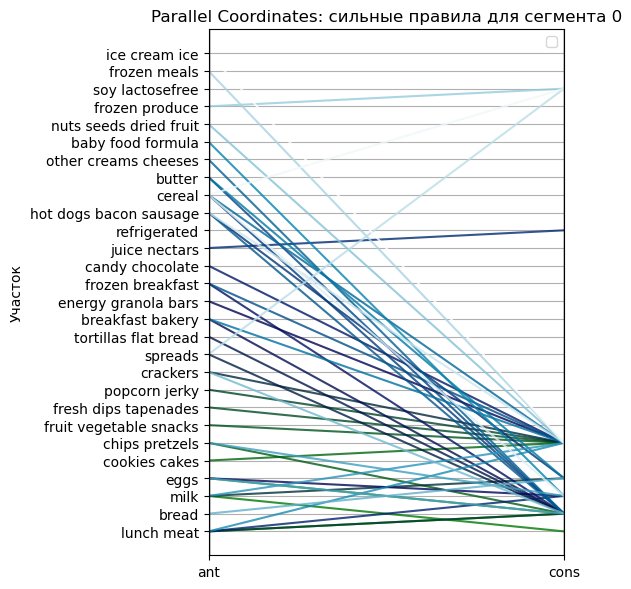

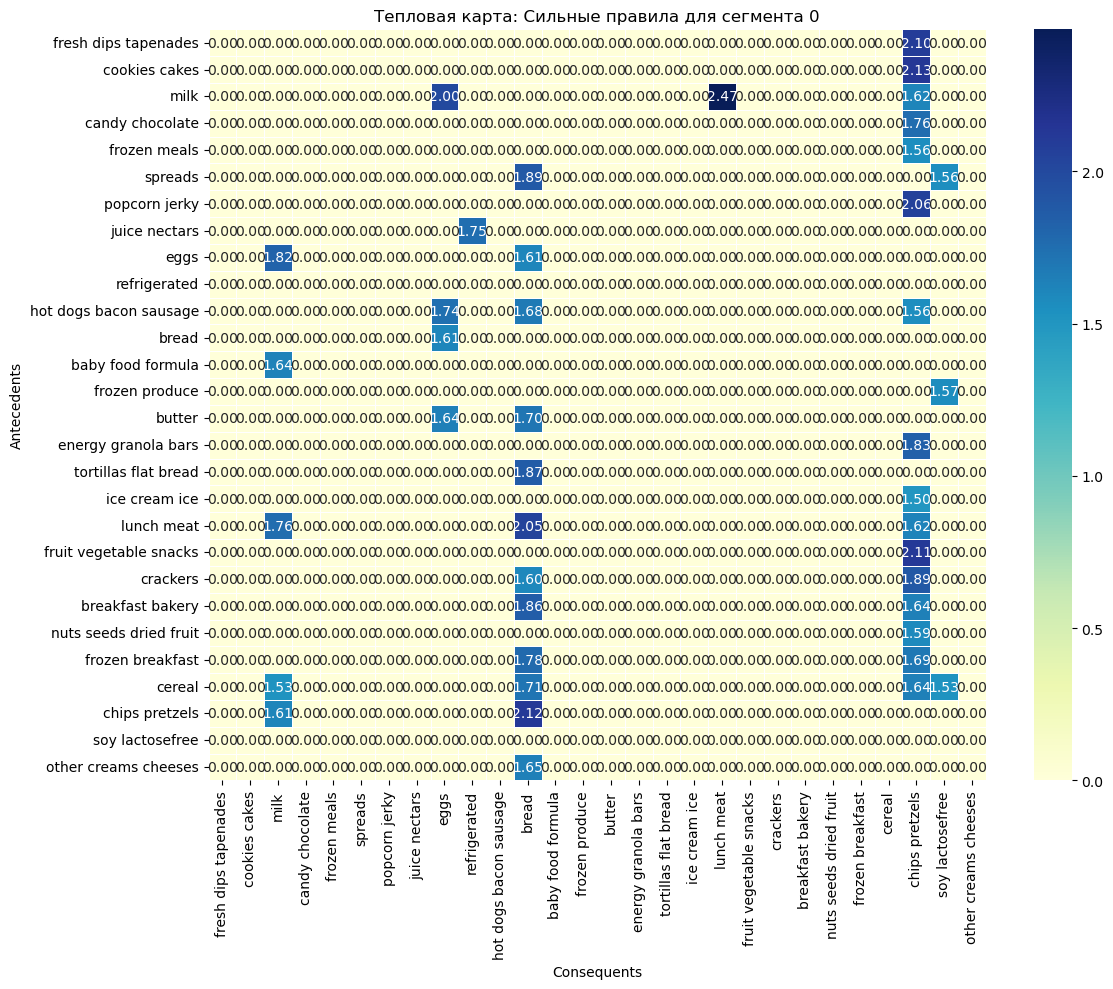

–°–µ–≥–º–µ–Ω—Ç –∑–∞–∫–∞–∑–æ–≤ 1
–ß–∞—Å—Ç—ã—Ö aisle (‚â•1‚ÄØ% –∏ –ø—Ä–æ—à–ª–∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—é): 71
basket: (41000, 71)
  ‚Üí —Å–∏–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª: 33



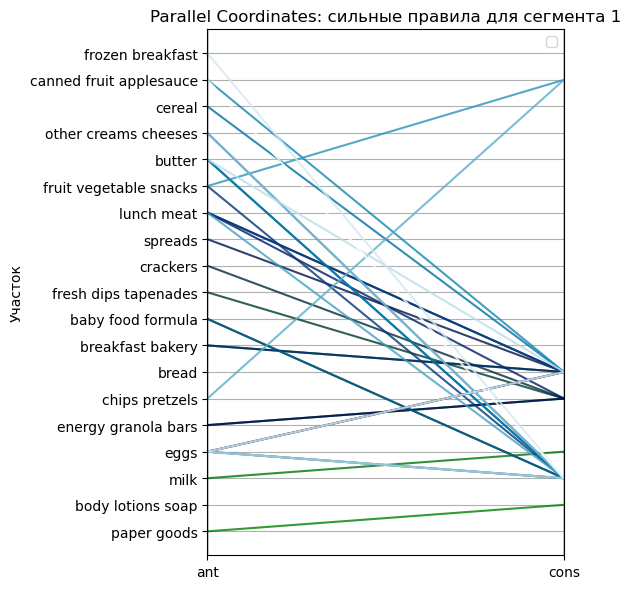

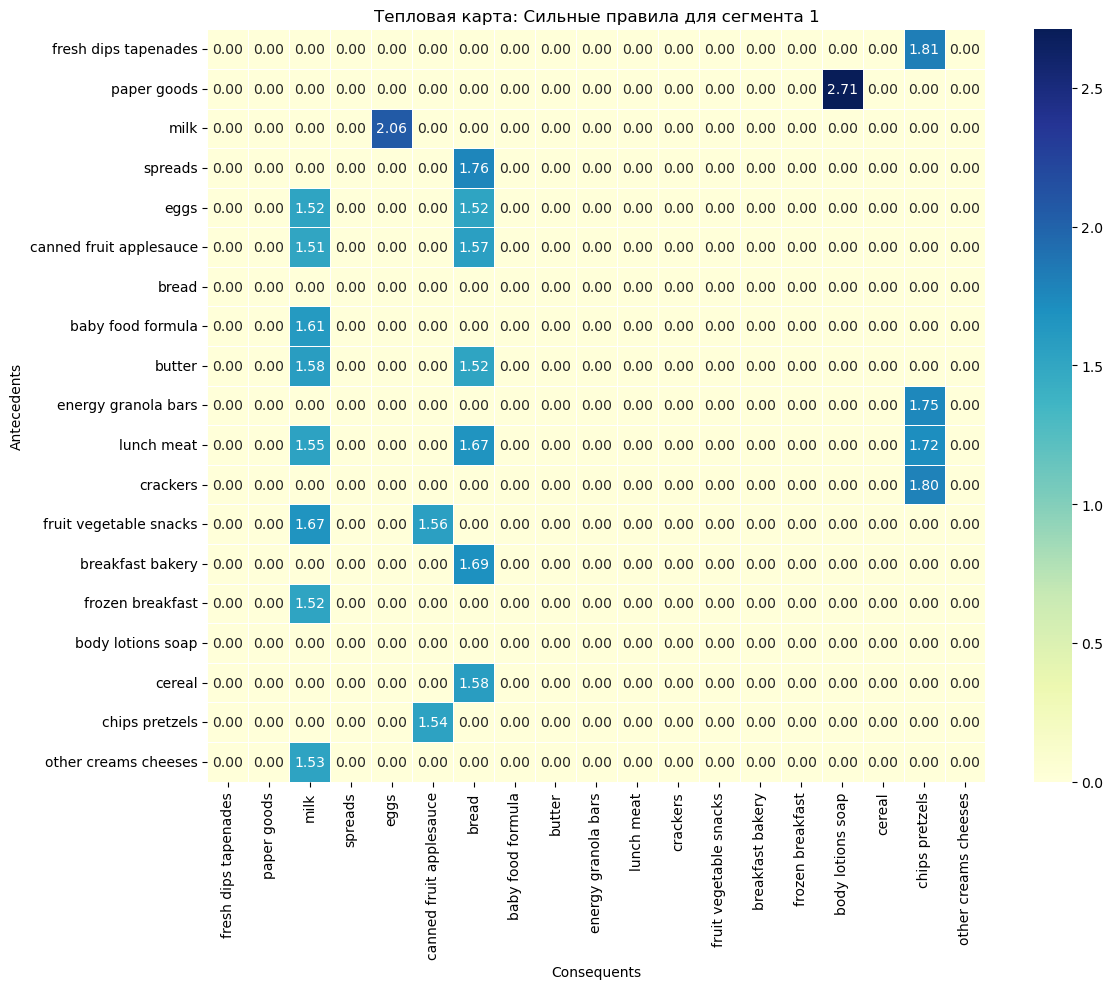

–°–µ–≥–º–µ–Ω—Ç –∑–∞–∫–∞–∑–æ–≤ 2
–ß–∞—Å—Ç—ã—Ö aisle (‚â•1‚ÄØ% –∏ –ø—Ä–æ—à–ª–∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—é): 52
basket: (9253, 52)
  ‚Üí —Å–∏–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª: 1



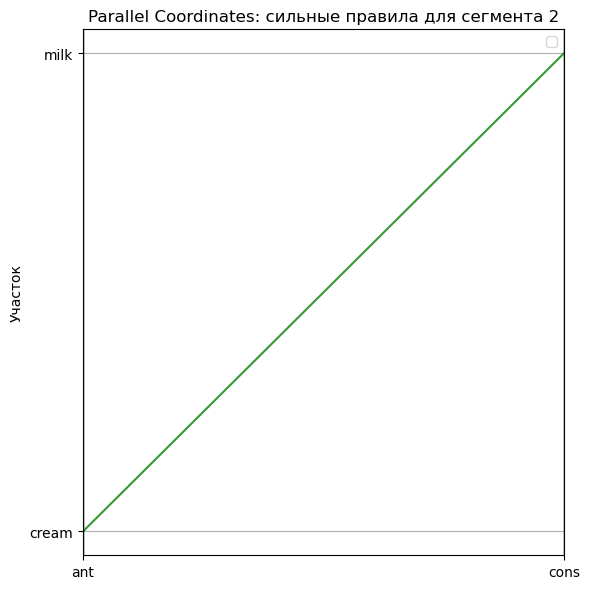

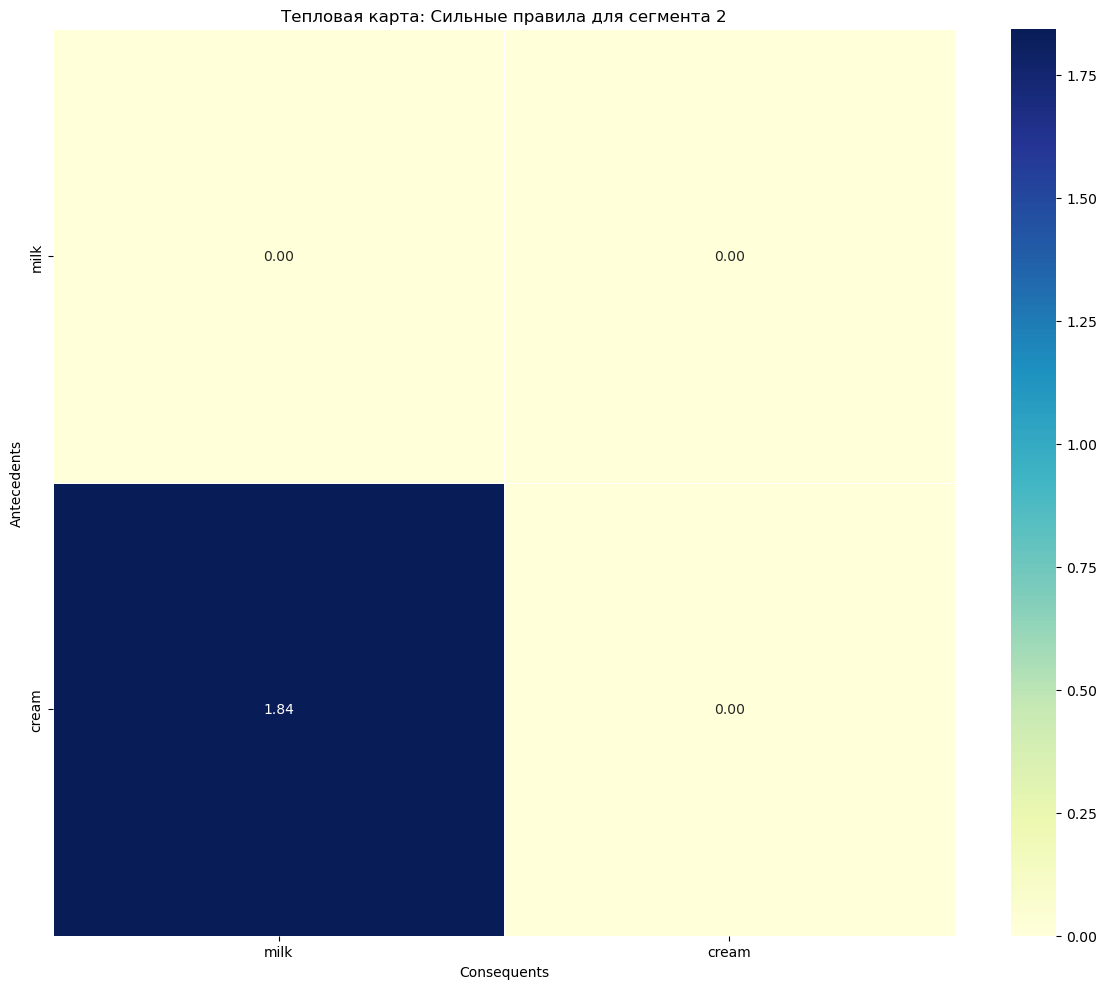

–°–µ–≥–º–µ–Ω—Ç –∑–∞–∫–∞–∑–æ–≤ 3
–ß–∞—Å—Ç—ã—Ö aisle (‚â•1‚ÄØ% –∏ –ø—Ä–æ—à–ª–∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—é): 62
basket: (11776, 62)
  ‚Üí —Å–∏–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª: 41



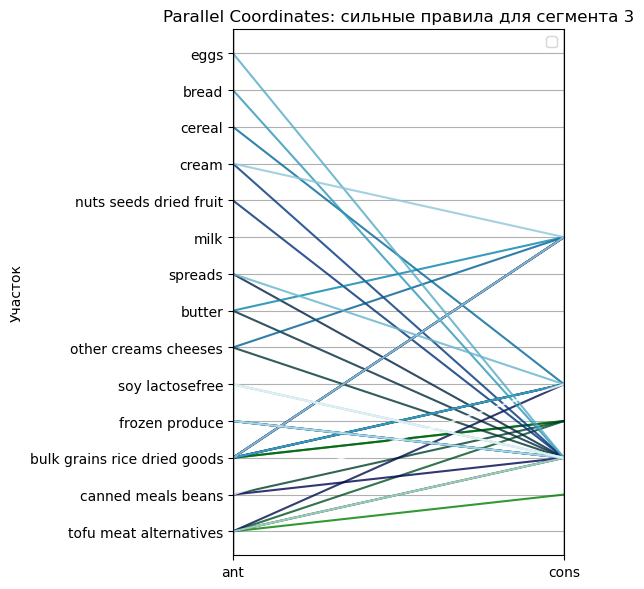

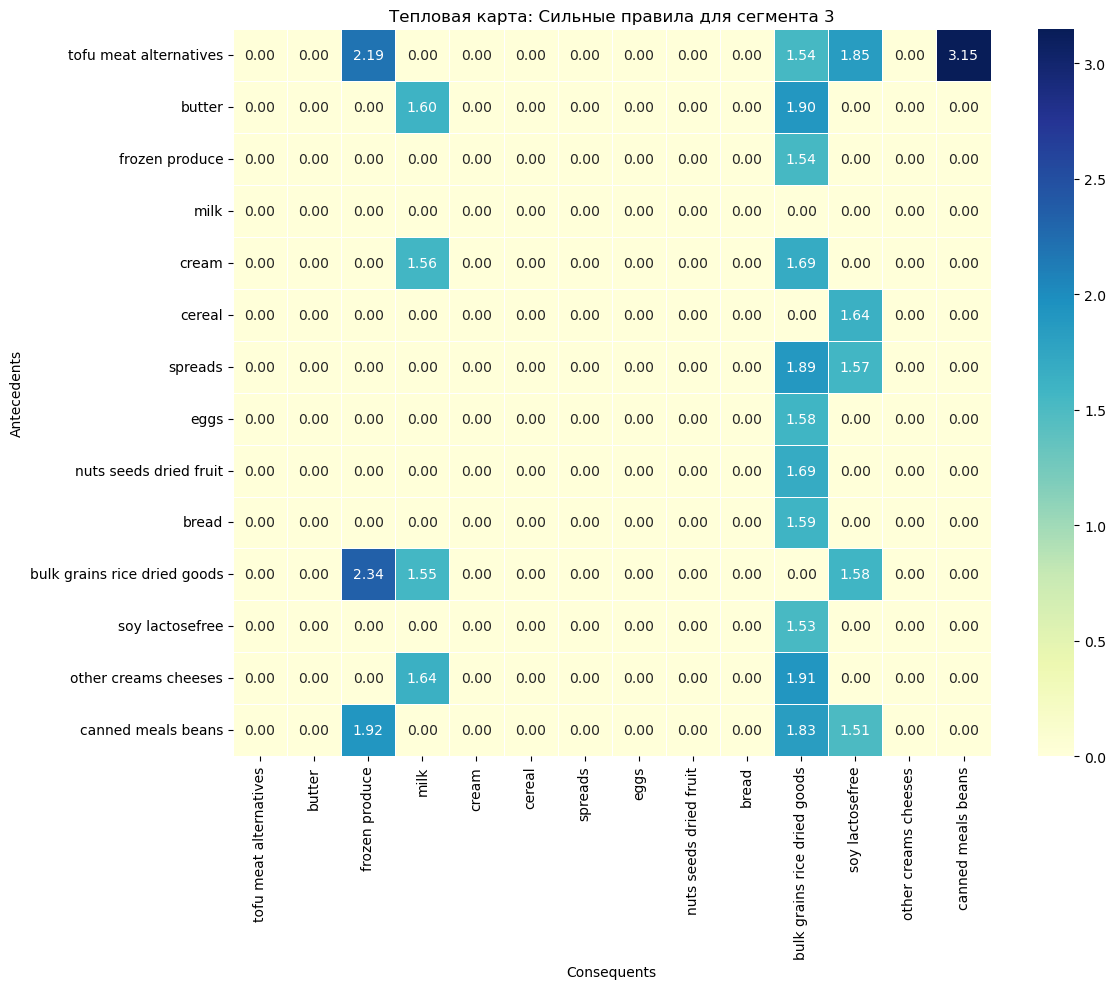

–°–µ–≥–º–µ–Ω—Ç –∑–∞–∫–∞–∑–æ–≤ 4
–ß–∞—Å—Ç—ã—Ö aisle (‚â•1‚ÄØ% –∏ –ø—Ä–æ—à–ª–∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—é): 71
basket: (242748, 71)
  ‚Üí —Å–∏–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª: 54



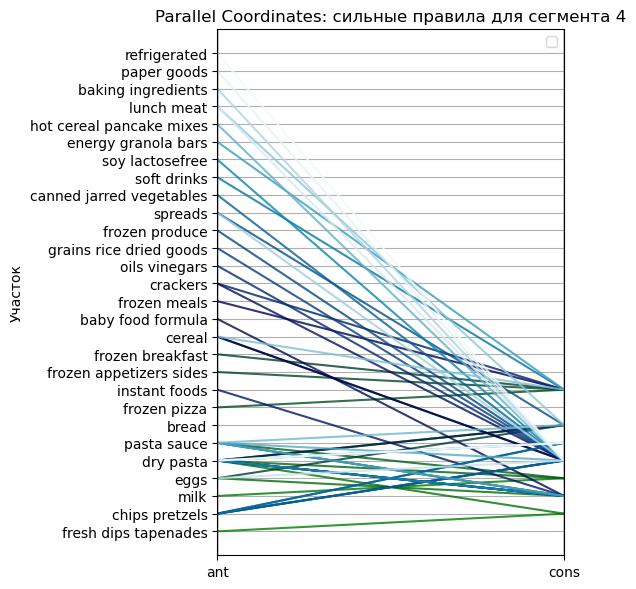

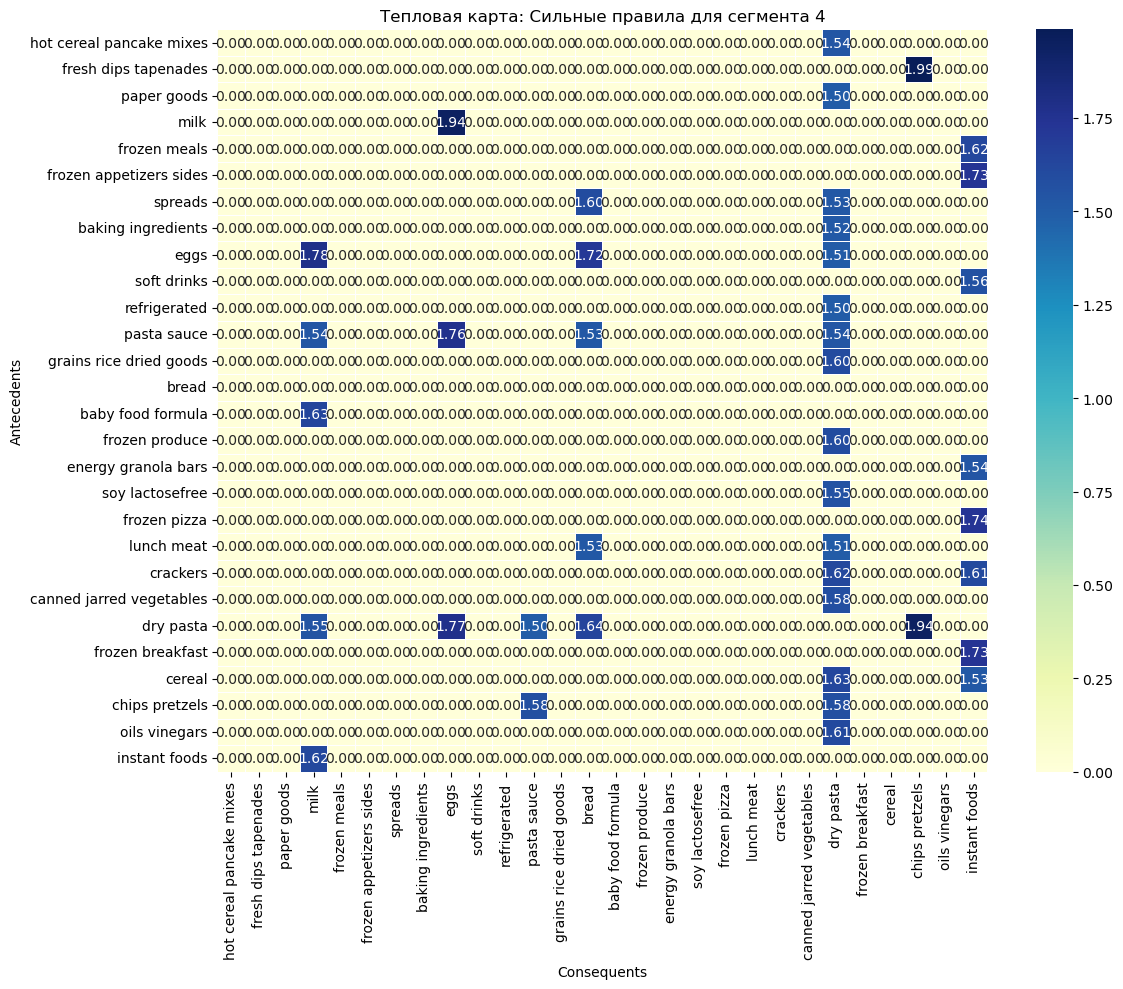

–°–µ–≥–º–µ–Ω—Ç –∑–∞–∫–∞–∑–æ–≤ 5
–ß–∞—Å—Ç—ã—Ö aisle (‚â•1‚ÄØ% –∏ –ø—Ä–æ—à–ª–∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—é): 31
basket: (12633, 31)
  ‚Üí —Å–∏–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª: 2



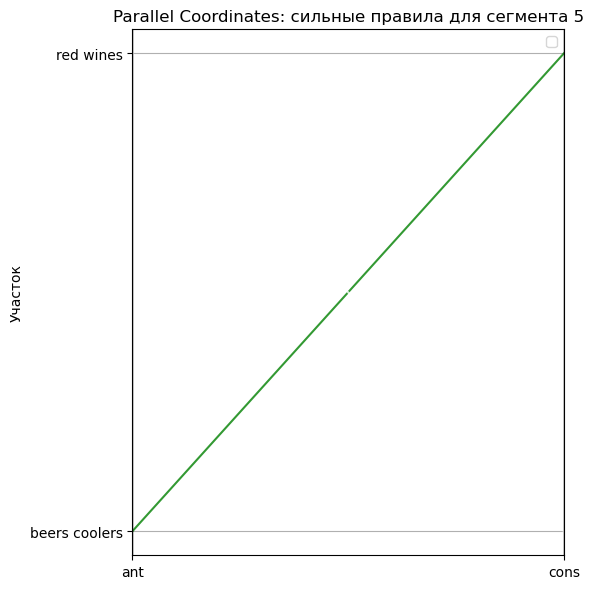

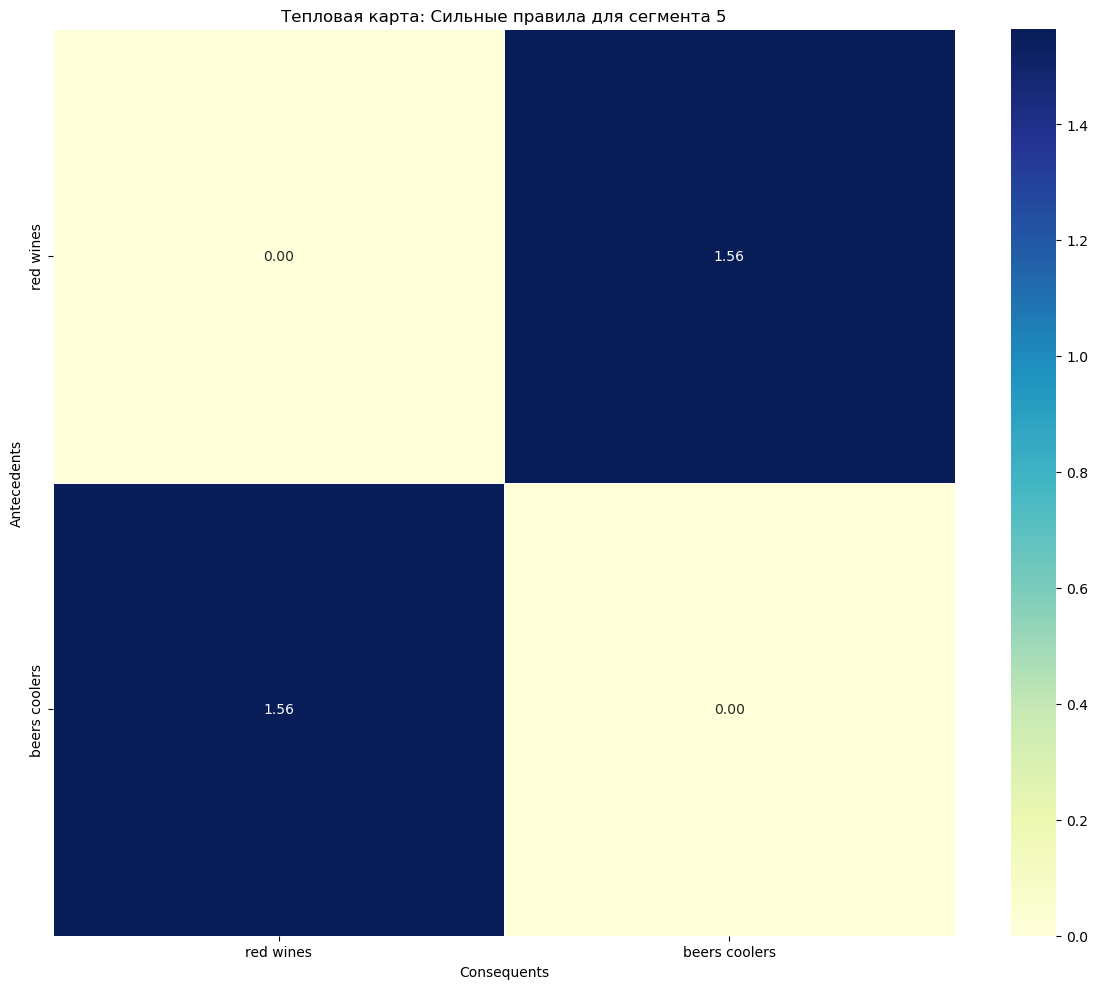

–°–µ–≥–º–µ–Ω—Ç –∑–∞–∫–∞–∑–æ–≤ 6
–ß–∞—Å—Ç—ã—Ö aisle (‚â•1‚ÄØ% –∏ –ø—Ä–æ—à–ª–∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—é): 71
basket: (125022, 71)
  ‚Üí —Å–∏–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª: 5



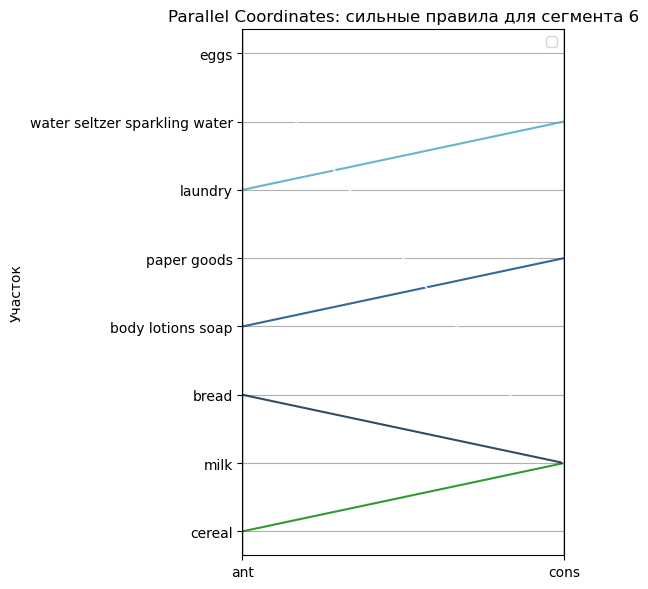

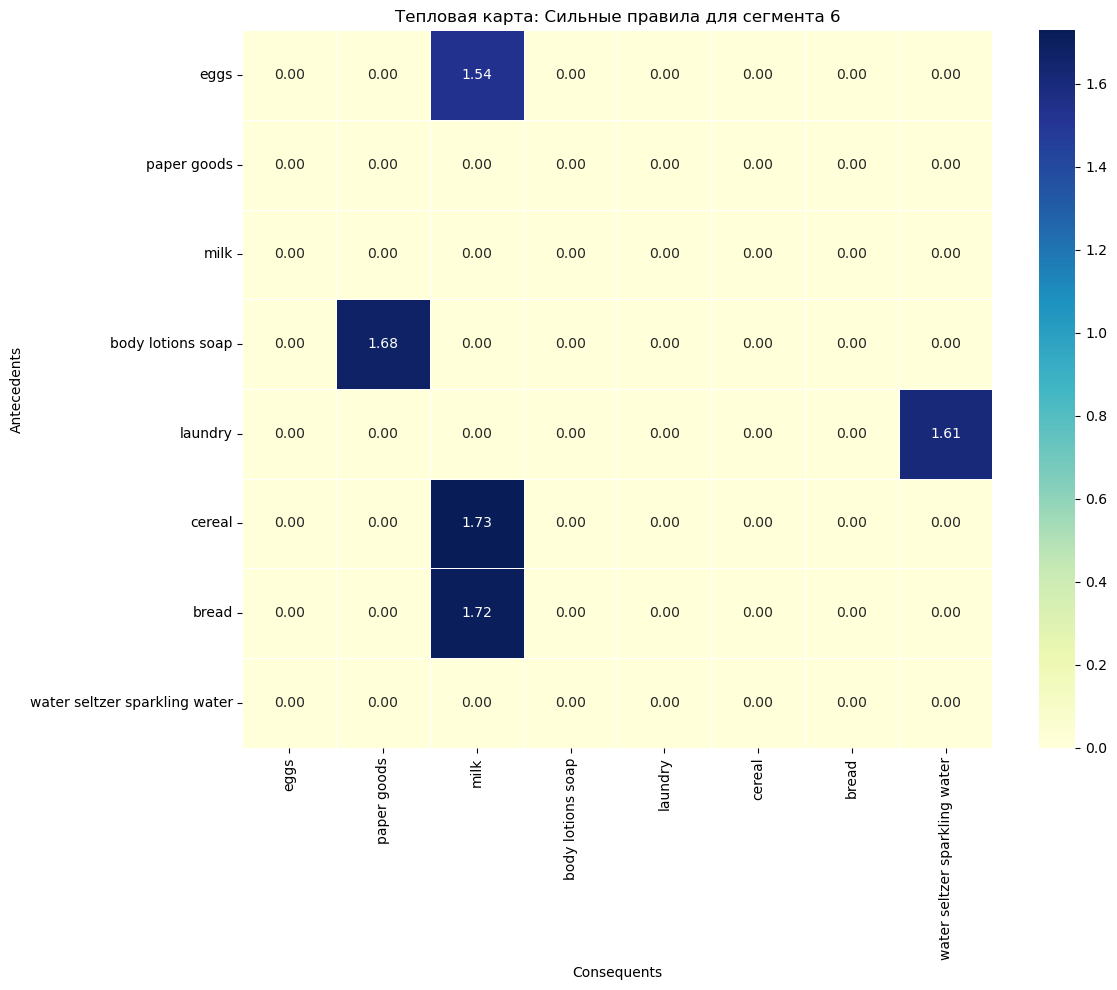

In [8]:
# %% -------------------- 3. –ú–∞–π–Ω–∏–º –ø—Ä–∞–≤–∏–ª–∞ –ü–û –°–ï–ì–ú–ï–ù–¢–ê–ú –ó–ê–ö–ê–ó–û–í --------------------
seg_rule_lists = {}            # <-- —Ç–µ–ø–µ—Ä—å –∫–ª—é—á–∏ = order‚Äësegment
all_frequent_aisles = set()    # —Å–æ–±–µ—Ä—ë–º –æ–±—ä–µ–¥–∏–Ω—ë–Ω–Ω—ã–π —Å–ø–∏—Å–æ–∫ —á–∞—Å—Ç—ã—Ö 'aisle'

for seg, df_seglist in order_cluster.groupby('order_segment'):
    print(f"–°–µ–≥–º–µ–Ω—Ç –∑–∞–∫–∞–∑–æ–≤ {seg}")

    # —Ñ–∏–ª—å—Ç—Ä—É–µ–º –∑–∞–∫–∞–∑—ã –¢–ï–ö–£–©–ï–ì–û —Å–µ–≥–º–µ–Ω—Ç–∞
    df_seg = df[df['order'].isin(df_seglist['order'])]

    # --- 1. support –ø–æ –æ—Ç–¥–µ–ª—å–Ω—ã–º aisle --------------------------
    n_orders = df_seg["order"].nunique()
    min_cnt  = int(0.01 * n_orders)           # 1‚ÄØ%

    order_cnts = df_seg.groupby("aisle")["order"].nunique()
    frequent_aisles = order_cnts[order_cnts >= min_cnt].index

    # üî• –ò—Å–∫–ª—é—á–∞–µ–º —Å–ª–∏—à–∫–æ–º –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∏ —Ä–µ–¥–∫–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –∫–∞–∫ –≤ —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏!
    frequent_aisles = [a for a in frequent_aisles if a not in exclude_aisles]

    all_frequent_aisles.update(frequent_aisles)   # –¥–ª—è test‚Äë–∫–æ—Ä–∑–∏–Ω—ã
    print(f"–ß–∞—Å—Ç—ã—Ö aisle (‚â•1‚ÄØ% –∏ –ø—Ä–æ—à–ª–∏ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—é): {len(frequent_aisles)}")

    # --- 2. basket‚Äë–º–∞—Ç—Ä–∏—Ü–∞ --------------------------------------
    df_unique = df_seg[df_seg["aisle"].isin(frequent_aisles)].drop_duplicates(["order", "aisle"])
    basket = pd.crosstab(df_unique["order"], df_unique["aisle"]).astype("uint8")
    print(f"basket: {basket.shape}")

    # --- 3. Apriori + –ø—Ä–∞–≤–∏–ª–∞ -----------------------------------
    freq_itemsets = apriori(basket, min_support=0.01, use_colnames=True, low_memory=True)
    rules = (
        association_rules(freq_itemsets, metric="support", min_threshold=0.01)
          .sort_values(["support", "lift"], ascending=False)
          .reset_index(drop=True)
    )

    # --- 4. —Ñ–∏–ª—å—Ç—Ä ¬´—Å–∏–ª—å–Ω—ã—Ö¬ª –ø—Ä–∞–≤–∏–ª (–ø–æ—Ä–æ–≥¬†–∫–∞–∫ —É –≤–∞—Å) -----------
    filtered = (
        rules[
            (rules["antecedent support"] >= 0.01) & #0.02
            (rules["consequent support"] >= 0.01) & #0.02
            (rules["confidence"]         >= 0.20) &
            (rules["lift"]               >= 1.50)
        ]
        .sort_values("lift", ascending=False)
        .reset_index(drop=True)
    )
    seg_rule_lists[seg] = filtered
    print(f"  ‚Üí —Å–∏–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª: {len(filtered)}\n")
    
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ø—Ä–∞–≤–∏–ª–∞ –≤ —É–¥–æ–±–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
    def to_coords(df_rules):
        df = df_rules.copy()
        df["ant"]  = df["antecedents"].apply(lambda s: list(s)[0])
        df["cons"] = df["consequents"].apply(lambda s: list(s)[0])
        df["rule"] = df.index.astype(str)
        return df[["ant", "cons", "rule"]]
    
    coords = to_coords(filtered)
    
    # –ü–∞—Ä–∞–ª–ª–µ–ª—å–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
    plt.figure(figsize=(6, 6))
    parallel_coordinates(coords, "rule", colormap="ocean", alpha=0.8)
    plt.title(f"Parallel Coordinates: —Å–∏–ª—å–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞ {seg}")
    plt.ylabel("–£—á–∞—Å—Ç–æ–∫")
    plt.legend([], [])  # —É–±–∏—Ä–∞–µ–º –ª–µ–≥–µ–Ω–¥—É
    plt.tight_layout()
    plt.show()
    
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ø—Ä–∞–≤–∏–ª–∞ –≤ —É–¥–æ–±–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
    def to_coords2(df_rules):
        df = df_rules.copy()
        df["ant"]  = df["antecedents"].apply(lambda s: list(s)[0])
        df["cons"] = df["consequents"].apply(lambda s: list(s)[0])
        df["rule"] = df.index.astype(str)
        return df[["ant", "cons", "rule", "lift"]]
    
    coords2 = to_coords2(filtered)
    
    # –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É
    # –°–æ–∑–¥–∞–¥–∏–º —Ç–∞–±–ª–∏—Ü—É –¥–ª—è heatmap: —Å—Ç—Ä–æ–∫–∏ ‚Äî antecedents, —Å—Ç–æ–ª–±—Ü—ã ‚Äî consequents
    aisles = list(set(coords2['ant'].unique()) | set(coords2['cons'].unique()))  # –£–Ω–∏–∫–∞–ª—å–Ω—ã–µ —É—á–∞—Å—Ç–∫–∏
    heatmap_data = pd.DataFrame(0, index=aisles, columns=aisles, dtype=float)
    
    # –ó–∞–ø–æ–ª–Ω—è–µ–º —Ç–∞–±–ª–∏—Ü—É –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ lift –¥–ª—è –∫–∞–∂–¥–æ–π –ø–∞—Ä—ã antecedent ‚Üí consequent
    for _, r in filtered.iterrows():
        a = list(r["antecedents"])[0]
        b = list(r["consequents"])[0]
        heatmap_data.loc[a, b] = r["lift"]
    
    # –ù–∞—Å—Ç—Ä–æ–∏–º —Ä–∞–∑–º–µ—Ä –∏ –æ—Ç–æ–±—Ä–∞–∑–∏–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É
    plt.figure(figsize=(12, 10))
    sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
    plt.title(f"–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞: –°–∏–ª—å–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞ {seg}")
    plt.xlabel("Consequents")
    plt.ylabel("Antecedents")
    plt.tight_layout()
    plt.show()

In [9]:
# %% -------------------- 4. TEST‚Äë–∫–æ—Ä–∑–∏–Ω–∞ (order_products__train) --------------------
df_pr   = pd.read_csv(os.path.join(DATA_DIR, "products.csv"))

df_test = (
    pd.read_csv(os.path.join(DATA_DIR, "order_products__train.csv"))
      .merge(df_pr[["product_id", "aisle_id"]], on="product_id", how="left")
      .merge(df_aisl, on="aisle_id", how="left")
      .rename(columns={"order_id": "order"})
      .loc[:, ["order", "aisle"]]
      .drop_duplicates(["order", "aisle"])
)
df_test = df_test[df_test["aisle"].isin(all_frequent_aisles)]
basket_test = pd.crosstab(df_test["order"], df_test["aisle"]).astype("uint8")

# –ø—Ä–∏—Å–æ–µ–¥–∏–Ω—è–µ–º –∫–æ–ª–æ–Ω–∫—É order_segment
basket_test = basket_test.merge(order_cluster, on="order", how="left")
print("test‚Äëbasket:", basket_test.shape)
basket_test.head()

test‚Äëbasket: (127488, 100)


order  air fresheners candles  asian foods  baby food formula  \
0      1                       0            0                  0   
1     36                       0            0                  0   
2     38                       0            0                  0   
3     96                       0            0                  0   
4     98                       0            0                  0   

   baking ingredients  beers coolers  body lotions soap  bread  \
0                   0              0                  0      0   
1                   0              0                  0      0   
2                   0              0                  0      0   
3                   0              0                  0      0   
4                   1              0                  0      0   

   breakfast bakery  breakfast bars pastries  ...  spices seasonings  spirits  \
0                 0                        0  ...                  0        0   
1                 0                        0  ...                  0        0   
2                 0                        0  ...                  0        0   
3                 0                        0  ...                  0        0   
4                 0                        0  ...                  0        0   

   spreads  tea  tofu meat alternatives  tortillas flat bread  \
0        0    0                       0                     0   
1        0    0                       0                     0   
2        0    0                       0                     0   
3        0    0                       0                     0   
4        0    0                       0                     1   

   trash bags liners  water seltzer sparkling water  white wines  \
0                  0                              0            0   
1                  0                              1            0   
2                  0                              0            0   
3                  0                              0            0   
4                  0                              1            0   

   order_segment  
0              3  
1              0  
2              0  
3              0  
4              0  

[5 rows x 100 columns]

In [10]:
# %% -------------------- 5. –ü—Ä–æ–≤–µ—Ä–∫–∞ train_vs_test CONF (order‚Äëseg ‚Üî order‚Äëseg)
#     + —Ñ–∏–ª—å—Ç—Ä –ø—Ä–∞–≤–∏–ª –ø–æ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ –Ω–∞ —Ç–µ—Å—Ç–µ
# ------------------------------------------------------------------------------
min_conf_test = 0.05 #0.05                      # –ü–æ—Ä–æ–≥ test‚Äëconfidence
good_rules = {seg: [] for seg in seg_rule_lists}   # ¬´–ø—Ä–æ—à–µ–¥—à–∏–µ¬ª –ø—Ä–∞–≤–∏–ª–∞

for test_seg, b_test_seg in basket_test.groupby('order_segment'):
    print(f"\n‚Üí –¢–µ—Å—Ç–æ–≤—ã–π order‚Äë—Å–µ–≥–º–µ–Ω—Ç {test_seg}  (–∑–∞–∫–∞–∑–æ–≤: {len(b_test_seg)})")
    base = b_test_seg.drop(columns=['order_segment'])       # bool‚Äë–º–∞—Ç—Ä–∏—Ü–∞

    for train_seg, rules in seg_rule_lists.items():
        for _, r in rules.iterrows():
            a = list(r["antecedents"])[0]
            b = list(r["consequents"])[0]

            if a not in base.columns or b not in base.columns:
                continue
            orders_with_a = base[base[a] == 1]
            if orders_with_a.empty:
                continue

            conf_test = (orders_with_a[b] == 1).mean()

            # ---- —Ñ–∏–ª—å—Ç—Ä –ø–æ test‚Äëconfidence ----
            if conf_test >= min_conf_test:
                good_rules[train_seg].append(r)
            # -----------------------------------

            #print(f"[train‚Äëseg {train_seg}] {a} ‚Üí {b}: "
                  #f"train_conf={r['confidence']:.2f}, test_conf={conf_test:.2f}")

# –ü—Ä–µ–≤—Ä–∞—â–∞–µ–º —Å–ø–∏—Å–∫–∏ –≤ DataFrame‚Äë—ã
good_rules = {seg: pd.DataFrame(lst) if lst else pd.DataFrame()
              for seg, lst in good_rules.items()}



‚Üí –¢–µ—Å—Ç–æ–≤—ã–π order‚Äë—Å–µ–≥–º–µ–Ω—Ç 0  (–∑–∞–∫–∞–∑–æ–≤: 103372)

‚Üí –¢–µ—Å—Ç–æ–≤—ã–π order‚Äë—Å–µ–≥–º–µ–Ω—Ç 1  (–∑–∞–∫–∞–∑–æ–≤: 2215)

‚Üí –¢–µ—Å—Ç–æ–≤—ã–π order‚Äë—Å–µ–≥–º–µ–Ω—Ç 2  (–∑–∞–∫–∞–∑–æ–≤: 589)

‚Üí –¢–µ—Å—Ç–æ–≤—ã–π order‚Äë—Å–µ–≥–º–µ–Ω—Ç 3  (–∑–∞–∫–∞–∑–æ–≤: 527)

‚Üí –¢–µ—Å—Ç–æ–≤—ã–π order‚Äë—Å–µ–≥–º–µ–Ω—Ç 4  (–∑–∞–∫–∞–∑–æ–≤: 12081)

‚Üí –¢–µ—Å—Ç–æ–≤—ã–π order‚Äë—Å–µ–≥–º–µ–Ω—Ç 5  (–∑–∞–∫–∞–∑–æ–≤: 540)

‚Üí –¢–µ—Å—Ç–æ–≤—ã–π order‚Äë—Å–µ–≥–º–µ–Ω—Ç 6  (–∑–∞–∫–∞–∑–æ–≤: 8164)


In [15]:
# %% -------------------- 6. –î–æ–ø—Ñ–∏–ª—å—Ç—Ä –ø–æ Precision / Recall –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∞–≤–∏–ª–∞ (OPT) ----------
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from joblib import Parallel, delayed          # pip install joblib (–µ—Å–ª–∏ –µ—â—ë –Ω–µ—Ç)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ –ü–ê–†–ê–ú–ï–¢–†–´ ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
k_top         = 5       # @k  –≤ precision / recall
min_prec_rule = 0.10 #0.10    # –ø–æ—Ä–æ–≥–∏
min_rec_rule  = 0.05 #0.05
n_jobs        = -1      # =‚Äë1 ‚Üí –≤—Å–µ —è–¥—Ä–∞; =1 ‚Üí –±–µ–∑ –ø–∞—Ä–∞–ª–ª–µ–ª–∏

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ –§–£–ù–ö–¶–ò–ò –í–ï–ö–¢–û–†–ù–û–ì–û –†–ê–°–ß–Å–¢–ê ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def pr_for_rules_vec(base_mat: np.ndarray,
                     true_len: np.ndarray,
                     idx_a: np.ndarray,
                     idx_b: np.ndarray,
                     k: int = 5):
    """
    Precision / Recall –¥–ª—è –ø—Ä–∞–≤–∏–ª ¬´a ‚áí b¬ª.
    –í Precision —É—á–∏—Ç—ã–≤–∞–µ–º –¢–û–õ–¨–ö–û consequent b.
    """
    rec_size = 1                              # —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ–º 1 —Ç–æ–≤–∞—Ä ‚Äì b

    # --- –ø–æ–ø–∞–ª–∏ –ª–∏ –º—ã consequent‚Äë–æ–º b (–±–µ–∑ antecedent‚Äë–∞!) ---
    hits_mat = base_mat[:, idx_b]             # (M, R) bool

    prec = hits_mat.mean(axis=0) / min(k, rec_size)   # Precision@k (k ‚â• 1 ‚Üí –¥–µ–ª–∏–º –Ω–∞ 1)

    mask = true_len > 0
    if mask.any():
        recall = (hits_mat[mask] / true_len[mask, None]).mean(axis=0)
    else:
        recall = np.zeros_like(prec)

    return prec, recall


def filter_rules_for_pair(basket_seg: pd.DataFrame,
                          rules_df: pd.DataFrame,
                          k: int = 5,
                          p_thr: float = 0.10,
                          r_thr: float = 0.05):
    """
    –§–∏–ª—å—Ç—Ä—É–µ—Ç rules_df (train‚Äësegment) –¥–ª—è –æ–¥–Ω–æ–≥–æ basket_seg (test‚Äësegment).
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª (itertuples).
    """
    if basket_seg.empty or rules_df.empty:
        return []

    # ----- –º–∞—Ç—Ä–∏—Ü–∞ –∑–∞–∫–∞–∑–æ–≤ -----
    base_mat = basket_seg.to_numpy(dtype=bool)
    true_len = base_mat.sum(axis=1)

    item2col = {it: i for i, it in enumerate(basket_seg.columns)}

    # ----- –æ—Å—Ç–∞–≤–ª—è–µ–º –ø—Ä–∞–≤–∏–ª–∞, —É –∫–æ—Ç–æ—Ä—ã—Ö –û–±–∞ —Ç–æ–≤–∞—Ä–∞ –µ—Å—Ç—å –≤ –∫–æ–ª–æ–Ω–∫–∞—Ö -----
    mask_valid = (
        rules_df["antecedents"].map(lambda s: next(iter(s)) in item2col) &
        rules_df["consequents"].map(lambda s: next(iter(s)) in item2col)
    )
    rules_valid = rules_df[mask_valid]
    if rules_valid.empty:
        return []

    idx_a = rules_valid["antecedents"].map(lambda s: item2col[next(iter(s))]).to_numpy()
    idx_b = rules_valid["consequents"].map(lambda s: item2col[next(iter(s))]).to_numpy()

    # ----- –≤–µ–∫—Ç–æ—Ä–Ω—ã–µ precision / recall –¥–ª—è –≤—Å–µ—Ö –ø—Ä–∞–≤–∏–ª -----
    prec, rec = pr_for_rules_vec(base_mat, true_len, idx_a, idx_b, k)

    keep = (prec >= p_thr) & (rec >= r_thr)
    return list(rules_valid[keep].itertuples(index=False))

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ –û–°–ù–û–í–ù–û–ô –ü–†–û–•–û–î –ü–û –°–ï–ì–ú–ï–ù–¢–ê–ú ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
final_rules = {seg: [] for seg in good_rules}    # good_rules –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö —à–∞–≥–æ–≤

for test_seg, basket_seg in tqdm(basket_test.groupby('order_segment'),
                                 desc="Test‚Äësegments", ncols=100):          # basket_test –∫–∞–∫ —Ä–∞–Ω—å—à–µ
    base = basket_seg.drop(columns=['order_segment'])

    # ‚Äî‚Äî‚Äî –ø–∞—Ä–∞–ª–ª–µ–ª—å –ø–æ train‚Äë—Å–µ–≥–º–µ–Ω—Ç–∞–º (–ø—Ä–∏ –∂–µ–ª–∞–Ω–∏–∏) ‚Äî‚Äî‚Äî
    def _proc(tr):
        train_seg, rules = tr
        kept = filter_rules_for_pair(base, rules,
                                     k=k_top, p_thr=min_prec_rule, r_thr=min_rec_rule)
        return train_seg, kept

    results = Parallel(n_jobs=n_jobs)(
        delayed(_proc)(tr) for tr in good_rules.items()
    )

    for train_seg, kept in results:
        final_rules[train_seg].extend(kept)

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ –§–û–†–ú–ò–†–£–ï–ú seg_rule_lists –ë–ï–ó –î–£–ë–õ–ò–ö–ê–¢–û–í ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
seg_rule_lists = {}
for seg, lst in final_rules.items():
    if not lst:                       # –ø—É—Å—Ç–æ?
        seg_rule_lists[seg] = pd.DataFrame()
        continue

    df = pd.DataFrame(lst)
    df = df.drop_duplicates(subset=["antecedents", "consequents"])  # <-- –∫–ª—é—á!
    seg_rule_lists[seg] = df

    print(f"–°–µ–≥–º–µ–Ω—Ç {seg}: —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞ ‚Äî {len(df)}")


Test‚Äësegments:   0%|                                                          | 0/7 [00:00<?, ?it/s]

–°–µ–≥–º–µ–Ω—Ç 1: —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞ ‚Äî 3
–°–µ–≥–º–µ–Ω—Ç 3: —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞ ‚Äî 13
–°–µ–≥–º–µ–Ω—Ç 4: —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞ ‚Äî 24
–°–µ–≥–º–µ–Ω—Ç 5: —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞ ‚Äî 1
–°–µ–≥–º–µ–Ω—Ç 6: —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø—Ä–∞–≤–∏–ª –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞ ‚Äî 1


In [17]:
def get_actual_dict(basket):
    """order ‚ûú set(aisles)"""
    return {oid: set(row.index[row == 1]) for oid, row in basket.iterrows()}

def precision_recall_matrix_orders(basket_test, k=5):
    actual = get_actual_dict(basket_test.drop(columns=['order_segment']))

    order_segs = list(seg_rule_lists.keys())
    prec = pd.DataFrame(index=order_segs, columns=order_segs, dtype=float)
    rec  = prec.copy()

    basket_by_seg = {
        seg: basket_test[basket_test['order_segment'] == seg]
              .drop(columns=['order_segment'])
        for seg in order_segs
    }

    # –≤–Ω–µ—à–Ω–∏–π –ø—Ä–æ–≥—Ä–µ—Å—Å: —Ç–µ—Å—Ç–æ–≤—ã–µ —Å–µ–≥–º–µ–Ω—Ç—ã
    for test_seg, basket_seg in tqdm(basket_by_seg.items(),
                                     desc="PR-–º–µ—Ç—Ä–∏–∫–∏: —Ç–µ—Å—Ç–æ–≤—ã–µ —Å–µ–≥–º–µ–Ω—Ç—ã",
                                     ncols=100):
        if basket_seg.empty:
            continue
        for train_seg, rules in seg_rule_lists.items():
            if basket_seg.empty or rules.empty:
                continue

            p_list, r_list = [], []
            for _, rule in rules.iterrows():
                a = list(rule["antecedents"])[0]
                b = list(rule["consequents"])[0]
                if a not in basket_seg.columns or b not in basket_seg.columns:
                    continue
                rec_items = {b}
                for oid in basket_seg.index:
                    true_items = actual[oid]
                    hit = int(b in true_items)
                    if true_items:
                        p_list.append(hit / min(k, len(rec_items)))
                        r_list.append(hit / len(true_items))
            if p_list:                               # –µ—Å–ª–∏ –æ—Å—Ç–∞–ª–∏—Å—å –≤–∞–ª–∏–¥–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞
                prec.loc[train_seg, test_seg] = np.mean(p_list)
                rec.loc[train_seg,  test_seg] = np.mean(r_list)
    return prec, rec

precision_df, recall_df = precision_recall_matrix_orders(basket_test, k=5)

print("\nPrecision@5  (—Å—Ç—Ä–æ–∫–∏ = train‚Äësegment, —Å—Ç–æ–ª–±—Ü—ã = test‚Äësegment):")
display(precision_df.fillna(0).style.format("{:.3f}").background_gradient("Blues"))

print("\nRecall@5:")
display(recall_df.fillna(0).style.format("{:.3f}").background_gradient("Greens"))

PR-–º–µ—Ç—Ä–∏–∫–∏: —Ç–µ—Å—Ç–æ–≤—ã–µ —Å–µ–≥–º–µ–Ω—Ç—ã:   0%|                                          | 0/7 [00:00<?, ?it/s]


Precision@5  (—Å—Ç—Ä–æ–∫–∏ = train‚Äësegment, —Å—Ç–æ–ª–±—Ü—ã = test‚Äësegment):



Recall@5:


In [18]:
# –ø–æ—Å–ª–µ —Ç–æ–≥–æ –∫–∞–∫ seg_rule_lists —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω –≤ –ø–∞–π–ø–ª–∞–π–Ω–µ –º–∞–π–Ω–∏–Ω–≥–∞
import joblib, json
from pathlib import Path

ART_DIR = Path('model_artifacts'); ART_DIR.mkdir(exist_ok=True)

joblib.dump(seg_rule_lists, ART_DIR/'seg_rule_lists.pkl')
print('‚úÖ  seg_rule_lists.pkl —Å–æ—Ö—Ä–∞–Ω—ë–Ω')


‚úÖ  seg_rule_lists.pkl —Å–æ—Ö—Ä–∞–Ω—ë–Ω
